Program: 02_clustering.R  
Date: July 3, 2019  
Programmer: Hillary Mulder  
Purpose: Use clustering techniques for BP type identification

In [4]:
#install.packages("cluster")
#install.packages("tidyverse")
#install.packages("factoextra")
#install.packages("dendextend")
#install.packages("fpc")

In [2]:
library(tidyverse)
library(cluster)
#library(factoextra)
library(dendextend)
library(Hmisc)
library(fpc)
data=read.csv("/mnt/workspace/DCRI/Data/analysis_ds.csv")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

---------------------
Welcome to dendextend version 1.12.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------


Attaching package: ‘dendextend’

The following object is masked from ‘package:stats’:

    cutree

Loading required package: l

In [1]:
#head(data)
#table(data$study.1)
#nrow(data)
#colnames(data)
#table(data$study)

Hierarchical clustering with baseline characteristics - Need to identify the optimal linkage type and number of clusters

In [28]:
base_nmiss=data[complete.cases(data[, c(1:3, 5, 6, 9:19, 20:22, 50, 51)]), c(1:3, 5, 6, 9:19, 20:22, 50, 51)]
base_nmiss$studyn=as.numeric(base_nmiss$study.1)
base_nmiss=base_nmiss[, -c(20,21)]
summary(base_nmiss)
nrow(base_nmiss)
set.seed(120)
rs=sample_n(base_nmiss, size=1500, replace=F)
nrow(rs)

   person_id             age            Sex           Race2      
 Min.   :21100001   Min.   :40.0   Min.   :1.00   Min.   :1.000  
 1st Qu.:21108716   1st Qu.:59.1   1st Qu.:1.00   1st Qu.:1.000  
 Median :23003680   Median :64.2   Median :1.00   Median :1.000  
 Mean   :22378579   Mean   :65.1   Mean   :1.39   Mean   :1.256  
 3rd Qu.:23015381   3rd Qu.:70.1   3rd Qu.:2.00   3rd Qu.:2.000  
 Max.   :24004998   Max.   :90.0   Max.   :2.00   Max.   :2.000  
      BMI             Toba           Htn              HxDM       
 Min.   :11.58   Min.   :0.00   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:26.60   1st Qu.:0.00   1st Qu.:1.0000   1st Qu.:0.0000  
 Median :29.91   Median :1.00   Median :1.0000   Median :1.0000  
 Mean   :30.65   Mean   :0.51   Mean   :0.8946   Mean   :0.5794  
 3rd Qu.:34.06   3rd Qu.:1.00   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :70.70   Max.   :1.00   Max.   :1.0000   Max.   :1.0000  
    HxMIStr           revasc            BP.s            BP.d       
 Min.   

[1] 32906

[1] 1500

In [15]:
m = c("average", "single", "complete", "ward")
names(m) = c("average", "single", "complete", "ward")
#ac=function(x){
#    agnes(rs, method=x)$ac
#}
#map_dbl(m, ac)
#hc=agnes(rs, method='ward')
#pltree(hc, cex=0.6, hang=-1, main='Dendrogram of AGNES')

sub_grp
  1   2   3 
895 426 179 

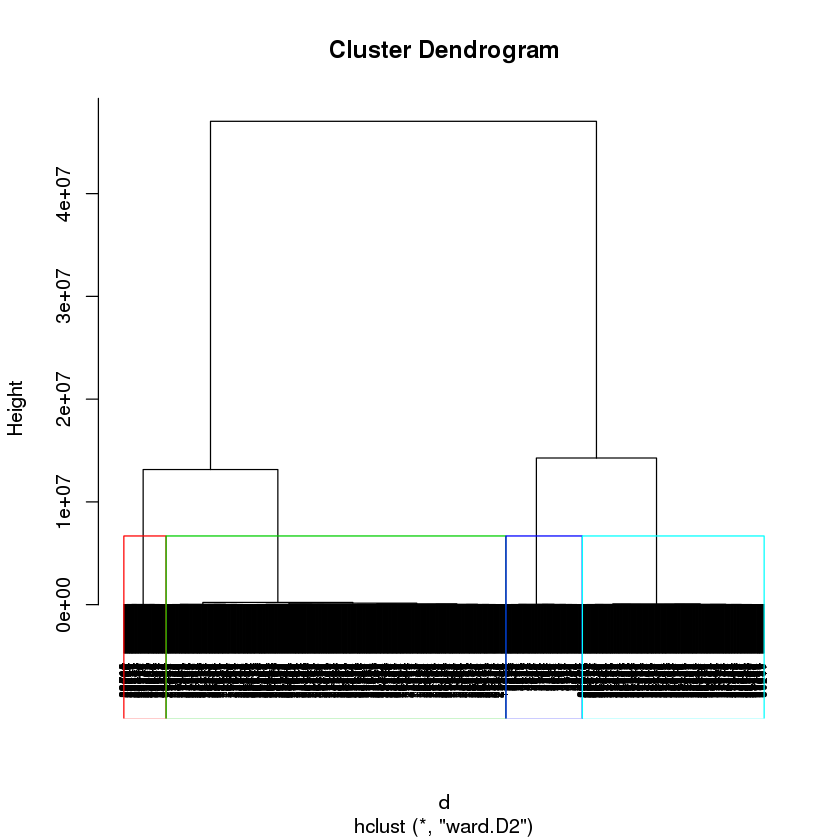

In [31]:
d=dist(rs, method='euclidean')
hc2=hclust(d, method='ward.D2')
sub_grp = cutree(hc2, k=3)
table(sub_grp)
plot(hc2, cex=0.6)
rect.hclust(hc2, k=4, border=2:5)

In [38]:
km1=kmeans(base_nmiss[,-20], centers=5)
base_nmiss$cluster=as.factor(km1$cluster)
str(km1)
table(base_nmiss$studyn, base_nmiss$cluster)

List of 9
 $ cluster     : Named int [1:32906] 1 1 1 1 1 1 1 1 1 1 ...
  ..- attr(*, "names")= chr [1:32906] "1" "2" "3" "4" ...
 $ centers     : num [1:5, 1:20] 21373914 23012184 24003019 23020279 23004050 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "1" "2" "3" "4" ...
  .. ..$ : chr [1:20] "person_id" "age" "Sex" "Race2" ...
 $ totss       : num 2.81e+16
 $ withinss    : num [1:5] 2.34e+15 3.17e+10 2.33e+09 3.14e+10 3.13e+10
 $ tot.withinss: num 2.34e+15
 $ betweenss   : num 2.57e+16
 $ size        : int [1:5] 13839 5754 1839 5780 5694
 $ iter        : int 3
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


   
       1    2    3    4    5
  1 9701    0    0    0    0
  2 4138    0    0    0    0
  3    0 5754    0 5780 5694
  4    0    0 1839    0    0

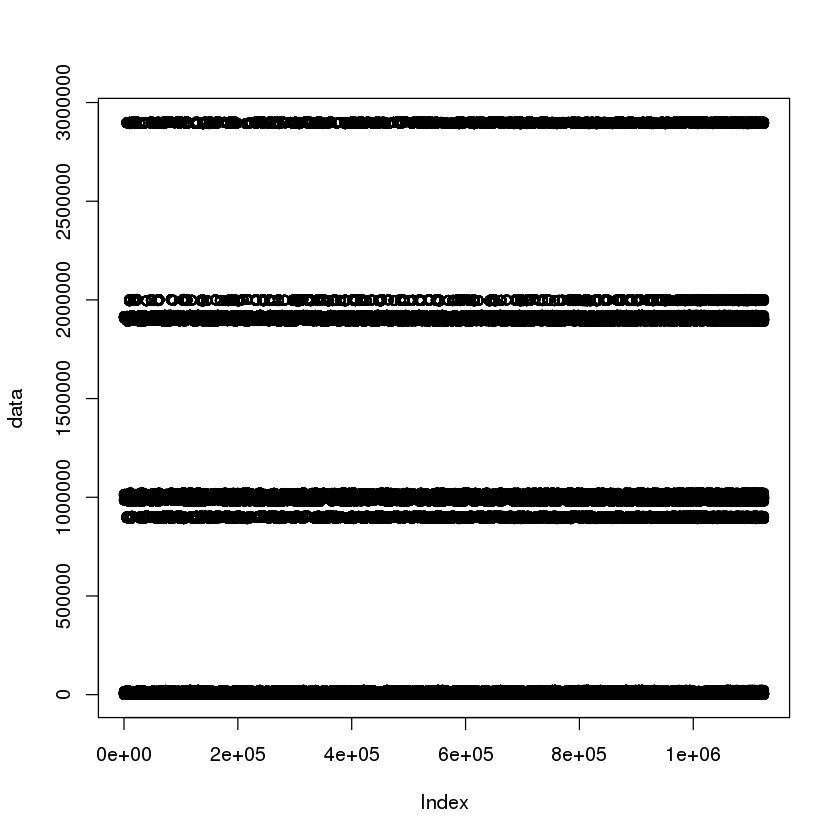

In [43]:
d=dist(rs, method='euclidean')
rs2=data.matrix(rs)
test=dbscan(rs2, 1)
plot(test, d)